## CSCI-UA 9473 Final Assignment

## Muhammad Wajahat Mirza

### Part II. Unsupervised Learning (20pts)

### Exercise II.1.  Clustering and latent representation

The lines below can be used to load and display (low resolution) images of digits from 0 to 9. The labels associated to each image are stored in the vector $y$. From this vector, only retain the images representing $4$ and $3$. We will temporarily forget about the labels for now and learn a 2D representation of the images through ISOMAP. 

### Import Libraries

In [221]:
from __future__ import division 
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin
from copy import copy, deepcopy
from numpy import linalg as LA
from sklearn.manifold import MDS
from scipy import linalg

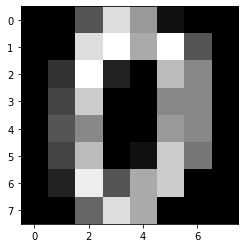

In [225]:
digits = datasets.load_digits(n_class=10)

X = digits.data
y = digits.target

plt.figure()
plt.imshow(np.reshape(X[0,:], (8,8)),cmap='gray',alpha=1) 
plt.show() 

# Question II.1.1 Building the graph (5pts)

We will start by building the graph representing the data. For this, we will follow the steps below 


__1.__ Center the dataset as $\mathbf{x}_i \leftarrow \mathbf{x}_i - \mathbb{E}_i\mathbf{x}_i$

__2.__ Compute the matrix of pairwise distances between the centered images. You can do this either by hand, noting that $D(\mathbf{x}_i, \mathbf{x}_j) = \|\mathbf{x}_i\|^2 + \|\mathbf{x}_j\|^2 - 2\langle \mathbf{x}_i, \mathbf{x}_j\rangle$ or using a call to the 'pairwise_distances' function from scikit learn. 

__3.__ Once you have the distance matrix, obtain the matrix of scalar products by squaring the distances and applying double centering

$$\mathbf{S} = -\frac{1}{2}(\mathbf{I} - \frac{1}{n}\mathbf{1}\mathbf{1}^T)\mathbf{D}^2(\mathbf{I} - \frac{1}{n}\mathbf{1}\mathbf{1}^T)$$

where $\mathbf{1} = \left[1,1,\ldots,1\right]$ is a vector of all ones and $\mathbf{I}$ is the indentity matrix.

__4.__ Compute the graph representation. The graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ si defined on a set of vertices $\mathcal{V}$ and a set of edges between those vertices $\mathcal{E}$. The set of vertices corresponds to the set of images in the original dataset. The set of edges will be defined according to the $K$-rule as explained below.

We will represent the graph through its adjacency matrix $A$ where $A_{ij} = 1$ if we draw an edge between vertex $i$ and vertex $j$. To build this adjacency matrix, we will add an edge between image $\mathbf{x}_i$ and image $\mathbf{x}_j$ whenever $\mathbf{x}_j$ is among the $K$ nearest neighbors of $\mathbf{x}_i$. 




# Solution
### Create List of 3's and 4's

In [226]:
n_samples, n_features = X.shape


lst_3 = []
lst_4 = []

for id, value in enumerate(y):
    if value == 3:
        lst_3.append(X[id])
    elif value == 4:
        lst_4.append(X[id])

lst_3 = np.array(lst_3)
lst_4 = np.array(lst_4)

num_concat = np.concatenate((lst_3, lst_4))
targets = np.concatenate((3*np.ones(lst_3.shape[0]), 4*np.ones(lst_4.shape[0])))

print("Num of Samples: {}  \nTotal features: {}\n".format(n_samples, n_features))
print("Target list: \n{}".format(targets))

Num of Samples: 1797  
Total features: 64

Target list: 
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 

In [227]:
X_mean = num_concat - np.mean(num_concat)
print("\nCenter of X: \n{}\n \nMean of X is: {}".format(X_mean, X_mean.mean()))


Center of X: 
[[-4.82443338 -4.82443338  2.17556662 ...  4.17556662 -4.82443338
  -4.82443338]
 [-4.82443338 -2.82443338  4.17556662 ...  6.17556662 -4.82443338
  -4.82443338]
 [-4.82443338 -3.82443338  3.17556662 ... -2.82443338 -4.82443338
  -4.82443338]
 ...
 [-4.82443338 -4.82443338 -4.82443338 ...  2.17556662 -4.82443338
  -4.82443338]
 [-4.82443338 -4.82443338 -4.82443338 ...  4.17556662 -4.82443338
  -4.82443338]
 [-4.82443338 -4.82443338 -4.82443338 ... -0.82443338 -4.82443338
  -4.82443338]]
 
Mean of X is: 7.320151810715317e-16


## Computing S using: 
$$\mathbf{S} = -\frac{1}{2}(\mathbf{I} - \frac{1}{n}\mathbf{1}\mathbf{1}^T)\mathbf{D}^2(\mathbf{I} - \frac{1}{n}\mathbf{1}\mathbf{1}^T)$$

In [228]:
def center(X):
    dist_mat = pairwise_distances(X_mean)
    dist_squ = np.square(dist_mat)
    
    instance = np.shape(dist_squ)[0]
    '''Ones on the diagonal and zeros elsewhere'''
    I = np.eye(instance)
    E = np.ones((instance, 1))
        
        
#     S = np.dot((I - (1/instance)*np.dot(E, E.T)), dist_squ)
#     S = np.dot(S, (I - (1/instance)*np.dot(E, E.T)))
#     S = (-1/2)*S
    
    S_first_term = np.dot((I - (1/instance)*np.dot(E, E.T)), dist_squ)
    S_second_term = (I - (1/instance)*np.dot(E, E.T))
    S = (-1/2)*np.dot(S_first_term, S_second_term)
    
    return S
S = center(X_mean)
print("Shape of S: {}".format(S.shape))


Shape of S: (364, 364)


### Nearest Neighbour

In [229]:
def near_neighbor(k, X_mean):
    k_mat = np.zeros((len(X_mean), k))
    D = pairwise_distances(X_mean.astype(np.float64))
    for val in range(len(X_mean)):
        k_mat[val] = D[val,:].argsort()[1:k+1]
    
    print("Shape of D is: {}\n\nK Neighbor Matrix: \n{}".format(D.shape,k_mat))
    
    return k_mat, D
k = 5
k_mat, D = near_neighbor(k, X_mean)

Shape of D is: (364, 364)

K Neighbor Matrix: 
[[ 26. 152. 156.  49.  28.]
 [ 35. 168.   7. 179.  31.]
 [ 25. 124.  15.  24.  19.]
 ...
 [362. 272. 358. 316. 308.]
 [300. 266. 361. 358. 363.]
 [306. 270. 263. 362. 305.]]


### Creating Adjaceny Matrix (Graph)

In [230]:
def mat_adjacency(K, S, D):
    A = np.zeros(shape = D.shape)
    for val in range(S.shape[0]):
        for val2 in range(S.shape[1]):
            if val == val2:
                continue
            elif val2 in K[val]:
                A[val][val2] = 1
            else:
                A[val][val2] = 999
                
    print("A Matrix is: \n\n{}\n".format(A))
    return A

S_mat = center(X_mean)
A = mat_adjacency(k_mat, S_mat, D) 

A Matrix is: 

[[  0. 999. 999. ... 999. 999. 999.]
 [999.   0. 999. ... 999. 999. 999.]
 [999. 999.   0. ... 999. 999. 999.]
 ...
 [999. 999. 999. ...   0.   1. 999.]
 [999. 999. 999. ...   1.   0.   1.]
 [999. 999. 999. ... 999.   1.   0.]]



# Question II.1.2 Computing the geodesic distances (5pts)

__1.__ Once we have the graph representation of the data, we need to compute the shortest path between any two vertices in this graph (shortest geodesic distance between any two images). To do that, connect the vertices that were not connected by the K nearest neighbors approach, with an edge of sufficiently large weight (To avoid having to take huge values, you might want to normalize the distances (resp scalar product) for example by normalizing by the norm of the matrix). You should then have an adjacency matrix $\mathbf{A}$ with $0$ on the diagonal and such that $A_{ij} = 1$ if the two images are connected and $A_{ij} = \inf$ or some large number if they are not.


__2.__ Let us denote the updated adjacency matrix as $\tilde{\mathbf{A}}$. From this matrix, we will now compute the shortest geodesic distance. That can be done through the Floyd-Warshall algorithm as indicated below.


### code the Floyd Warshall algorithm as follows
         for k = 1 to n
 
             for i =1 to n
     
                 for j = 1 to n
         

$$\tilde{A}_{ij}\leftarrow\min(A_{ij}, A_{ik + A_{kj}})$$

## Solution

In [231]:
def Floyd_Warshall(A, N):
    d = deepcopy(A)
    
    for k in range(N):
        for j in range(N):
            for i in range(N):
                d[i][j] = min(d[i][j], d[i][k]+ d[k][j])

    return d

In [232]:
N = A.shape[0]
d = Floyd_Warshall(A, N)

In [233]:
print("Shape of d: {}\nd[0] is: \n{}\n".format(d.shape, d[0]))

Shape of d: (364, 364)
d[0] is: 
[  0.   5.   9.   9.   8.   8.   8.   6.   8.   7.   7.   7.  11. 999.
   7.   9.   5.   7.   8.   9.   7.   7.   7.   6.   8.  10.   1.   5.
   1.   5.   4.   5.   4.   4.   4.   4.   3.   4.   2.   5.  12.   3.
   6.   3.   4.   3.   4.   2.   2.   1. 999. 999. 999. 999. 999. 999.
 999. 999. 999. 999. 999. 999. 999. 999. 999. 999.   5.   7.   6. 999.
   6.   6.   5.   4.   6.   6.   6.   6.   5.   5.   2.   3.   4.   5.
   6.  11.  10.   5.   2.   4.   6.   7.   3.   5.   3.   4.   2.   6.
   4.   6.   5.   4.   5.   3.   6.   3.   3.   4.   5.   6.   6.   6.
   5.   2.   2. 999.   3. 999.   5.   7.   4.  10.   5.   6.  10.   6.
   6.   6.   5.   6.   7. 999.   5.   4.   4.   6.   7.   6.   5.   3.
   6. 999.   6.   4.   2.   2.   2.   4.   3.   3.   3.   3.   1.   3.
   5.   4.   1.   7.  11.   7.  10.   9.  10.  11.   9.   7.   7. 999.
   6.   6.   6.   8.   8.  10.   9.  10. 999.   9.   9.   6. 999.   7.
   8. 999. 999. 999. 999. 999. 999. 999. 999

# Question II.1.3 Low dimensional projection (2pts)

To conclude, from the matrix of geodesic distances, compute the low dimensional representation. Do this by

1. First getting the singular value decomposition of the geodesic distance matrix as $\mathbf{S}_\mathcal{G} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^T$. Define the projection as $\mathbf{I_{P\times N}}\mathbf{\Lambda}^{1/2}\mathbf{U}^T$ with $P=2$ (that is retain the first two rows of the matrix $\mathbf{\Lambda}^{1/2}\mathbf{U}^T$).

2. Represent each image $\mathbf{x}_i$ from the $2$ tuple encoded in the $i^{th}$ column of $\mathbf{I}_{2\times N}\mathbf{\Lambda}^{1/2}\mathbf{U}^T$. Display the result below.


##### Email Question Correction
There is a mistake in Assignment 4, Question II.1.3. You have to compute the eigenvalue decomposition (U Lambda U^T) of the scalar product matrix S obtained from the square of the geodesic distance matrix (S can be obtained from D^2 through double centering) and not from the geodesic distance matrix itself. In other words, from the Floyd Warshall algorithm, you get the graph (geodesic) distance matrix. But then, as you did in Q. II.1.1, you need to square the matrix of distances and then get the scalar product matrix from D^2 by using double centering, i.e. 
S_G = -1/2 (I - (1/n)11^T)D^2_G(I - (1/n)11^T)

Once you have S_G you can get the low dimensional representation by computing the eigenvalue decomposition and retaining the first two rows from Lambda^(1/2)U^T

if you have done the computations for D, doing it for S is straightforward though

# Solution

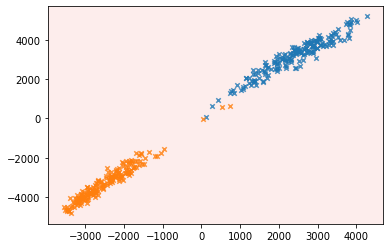

In [236]:
def low_dimension(d):
    w, v = LA.eig(d)
    
    S = center(d)
    S_gra = np.dot(np.sqrt(v), S.T)
    I = np.identity(364)

    f = np.dot(I, S_gra)
    x = f[0].real
    y = f[1].real

    U_U = []
    for i in range(x.shape[0]):
        c = np.array([x[i], y[i]])
        U_U.append(c)
    U_U = np.asarray(U_U)
    
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = '#FDEDEC'
    plt.scatter(U_U[:183, 0], U_U[:183, 1], s = 20, marker = 'x', cmap = "cool", alpha = 0.8)
    plt.scatter(U_U[183:, 0], U_U[183:, 1], s = 20, marker = 'x', cmap = "cool", alpha = 0.8)
    
    return U_U

U_U = low_dimension(d)

In [237]:
 print("\nSome Values returned by Low_dimensionality Function:\n \n{}\n".format(U_U[:10]))


Some Values returned by Low_dimensionality Function:
 
[[2763.28257595 3383.23244047]
 [2690.52585643 3742.19691114]
 [1350.47522381 1908.47488182]
 [2887.57878181 3670.26484252]
 [2074.10360441 3008.95500345]
 [2655.6194525  3522.07205434]
 [2458.47743728 3587.46326024]
 [1993.88572106 3264.35353114]
 [1296.44252406 1927.06822682]
 [2080.35101207 3038.75731307]]



### Exercise II.2. (K-means)

# Question II.2.1 (8pts)

Now that we have a two dimensional representation for the images. We will use a clustering algorithm to learn how to distinguish between the two digits. 


__1.__ Start by splitting the dataset into a training and a validation set (let us take $90\%$ training and $10\%$ validation). 

__2.__ Initialize the $K$-means algorithm with $2$ centroids located at random positions

__3.__ Assign each point to its nearest centroid as 

$$\mathcal{C}(\mathbf{x}_i) \leftarrow \underset{k}{\operatorname{argmin}}  \|\mathbf{x}_i - \mathbf{c}_{k}\|^2$$

__4.__ Update the centroids as 

$$\mathbf{c}_k \leftarrow \frac{1}{N_k}\sum_{\ell\in \mathcal{C}_k}\mathbf{x}_\ell,\quad k=1,2.$$

__5.__ Make sure to properly treat empty clusters. If you end up with an empty cluster, restart the iterations by splitting the single cluter you have into two sub-clusters and define your new centroids as the centers of mass of those clusters. 


# Solution 

                    Use this Equation
$$\mathbf{c}_k \leftarrow \frac{1}{N_k}\sum_{\ell\in \mathcal{C}_k}\mathbf{x}_\ell,\quad k=1,2.$$

Labels are: 

[1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1
 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1]

 Centeriods of the two clusters are: 
 [[-2497.61171634 -3295.30656757]
 [ 2400.59008626  3146.60710101]]


Visual Representation of two clusters


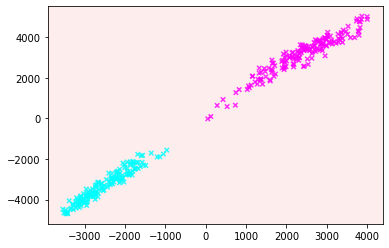

In [238]:
def K_means(X):
    
    np.random.shuffle(X)
    '''Using 90% for test and 10% for validate'''
    id_break = round(0.9*X.shape[0])

    train = deepcopy(X[:id_break])
    test = deepcopy(X[id_break:])
    K, instance, count = 2, train.shape[0], train.shape[1]
    
    ''' Mean, STD and Centeriods'''
    mean = np.mean(train, axis = 0)
    std = np.std(train, axis = 0)
    center = np.random.randn(K,count)*std + mean
    
    '''Previous and New current centers'''
    center_prev = np.zeros(center.shape) 
    center_curr = deepcopy(center) 
    
    '''Clusters'''
    clusters = np.zeros(instance)
    distances = np.zeros((instance,K))
    err = np.linalg.norm(center_curr - center_prev)
    
    '''Updating until Error = 0'''
    while err != 0:
        for i in range(K):
            distances[:,i] = np.linalg.norm(train - center_curr[i], axis=1)
        clusters = np.argmin(distances, axis = 1) 
        center_prev = deepcopy(center_curr)

        for i in range(K):
            center_curr[i] = np.mean(train[clusters == i], axis=0) 
        err = np.linalg.norm(center_curr - center_prev)

    labels = pairwise_distances_argmin(train, center_curr)

    print("Labels are: \n\n{}\n\n Centeriods of the two clusters are: \n {}".format(labels,center_curr))
    print("\n\nVisual Representation of two clusters")
    
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = '#FDEDEC'
    plt.scatter(train[:, 0], train[:, 1], c = labels, s = 20, marker = 'x', cmap = "cool", alpha = 0.8)
    
    return train, test, labels, err, center_curr
train, test, labels, error, center = K_means(U_U)

## Testing on Validation


Visual Representation of Clusters on Validation Dataset


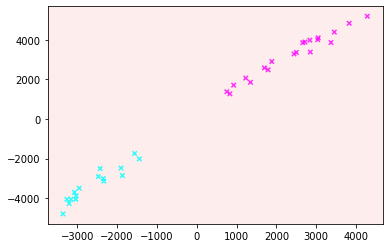

In [239]:
new_label = pairwise_distances_argmin(test, center)
print("\nVisual Representation of Clusters on Validation Dataset")
plt.scatter(test[:, 0], test[:, 1], c = new_label, s = 20, marker = 'x', cmap = "cool", alpha = 0.8)

# End of Code For UnSupervised Section